In [ ]:
## Importing library 

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split

In [ ]:
## Loading data 

In [3]:
base_path = 'E:\signal datasets'
print(os.listdir(base_path))

['Dataset.zip', 'Meta', 'Meta.csv', 'Test', 'Test.csv', 'Train', 'Train.csv']


In [4]:
## how man catagory we have for classification
len(os.listdir(os.path.join(base_path, 'Train')))

43

In [5]:
# Read in the image data and labels
data = []
labels = []
number_of_classes = 43

for i in range(number_of_classes):
    path = os.path.join(base_path, 'Train', str(i))
    images = os.listdir(path)
    
    for item in images:
        try:
            image = Image.open(path + '/' + item)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print('Error loading the image file')
data = np.array(data)
labels = np.array(labels)

In [6]:
## Checking the shape of data and label
print(f'Shape of the data {data.shape}')
print(f'Shape of the labels {labels.shape}')

Shape of the data (39209, 30, 30, 3)
Shape of the labels (39209,)


In [7]:
# Split into training and validation data 
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
# normalize the input data
# Every digital image is formed by pixel having value in range 0~255. 0 is black and 255 is white. For colorful image,
#It contains three maps: Red, Green and Blue, and all the pixel still in the range 0~255 every digital image is formed by pixel having value in range 0~255. 0 is black and 255 is white. For colorful image, 
#It contains three maps: Red, Green and Blue, and all the pixel still in the range 0~255.
#Since 255 is the maximin pixel value. Rescale 1./255 is to transform every pixel value from range [0,255].
X_train = X_train/255.
X_test = X_test/255.

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(31367, 30, 30, 3)
(31367,)
(7842, 30, 30, 3)
(7842,)


In [8]:
# one hot encoding the labels for the training and validation labels
y_train = to_categorical(y_train, number_of_classes)
y_test = to_categorical(y_test, number_of_classes)

In [9]:
# creating CNN model defination
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=X_train.shape[1:]),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D(2,2),
    Dropout(0.3),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D(2,2),
    Dropout(0.3),
    Conv2D(128, (3,3), activation='relu'),
    MaxPool2D(2,2),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(number_of_classes, activation='softmax')
])

# Compiling the model
metrics = ['accuracy',
           tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall')
          ]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=metrics)

In [10]:
# Running the model
epochs = 15
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=1)

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 129s 4ms/sample - loss: 2.0125 - accuracy: 0.4158 - precision: 0.8349 - recall: 0.2746 - val_loss: 0.5072 - val_accuracy: 0.8798 - val_precision: 0.9616 - val_recall: 0.7257
Epoch 2/15
31367/31367 [==============================] - 130s 4ms/sample - loss: 0.5040 - accuracy: 0.8398 - precision: 0.9032 - recall: 0.7792 - val_loss: 0.1205 - val_accuracy: 0.9681 - val_precision: 0.9831 - val_recall: 0.9513
Epoch 3/15
31367/31367 [==============================] - 132s 4ms/sample - loss: 0.2833 - accuracy: 0.9098 - precision: 0.9388 - recall: 0.8840 - val_loss: 0.0704 - val_accuracy: 0.9830 - val_precision: 0.9905 - val_recall: 0.9718
Epoch 4/15
31367/31367 [==============================] - 133s 4ms/sample - loss: 0.2075 - accuracy: 0.9352 - precision: 0.9550 - recall: 0.9177 - val_loss: 0.0475 - val_accuracy: 0.9893 - val_precision: 0.9955 - val_recall: 0.9830
Epoch 5/15
31367/31367 

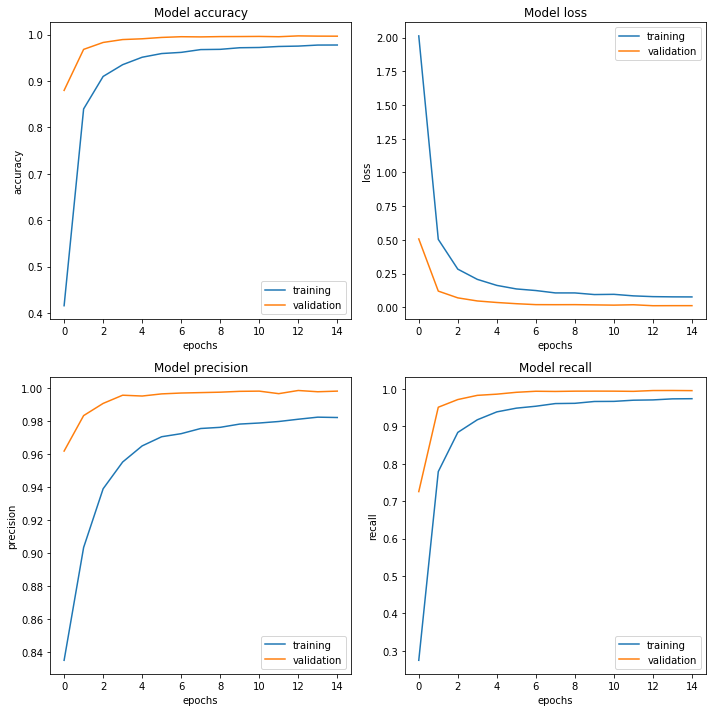

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

for i, met in enumerate(['accuracy', 'loss', 'precision', 'recall']):
    axs[i].plot(history.history[met])
    axs[i].plot(history.history['val_' + met])
    axs[i].set_title(f'Model {met}')
    axs[i].set_xlabel('epochs')
    axs[i].set_ylabel(met)
    axs[i].legend(['training', 'validation'])
plt.tight_layout()

In [12]:
# read in the Test.csv file 
test_data = pd.read_csv(os.path.join(base_path, 'Test.csv'))
test_data.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [13]:
# extract the 'ClassId' and image 'Path'
image_file_path = test_data['Path'].values
print(image_file_path[:5])

test_labels = test_data['ClassId'].values
print(test_labels[:5])

['Test/00000.png' 'Test/00001.png' 'Test/00002.png' 'Test/00003.png'
 'Test/00004.png']
[16  1 38 33 11]


In [14]:
# Read in the image data and normalize it
data=[]

for img in image_file_path:
    image = Image.open(base_path + '/' + img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test = np.array(data)
X_test = X_test/255.

In [15]:
# making prediction
prediction = model.predict_classes(X_test)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(test_labels, prediction))

0.9800475059382423


In [17]:
print(classification_report(test_labels, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      0.99      1.00       720
           2       0.99      0.99      0.99       750
           3       0.99      0.97      0.98       450
           4       0.99      0.99      0.99       660
           5       0.97      0.98      0.98       630
           6       0.99      0.89      0.93       150
           7       0.99      0.99      0.99       450
           8       0.97      0.99      0.98       450
           9       0.98      1.00      0.99       480
          10       0.99      0.98      0.99       660
          11       0.99      0.96      0.97       420
          12       1.00      0.98      0.99       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.97      1.00      0.98       210
          16       0.96      0.99      0.97       150
          17       1.00    